
**Vamos fazer a predição de insuficiência cardíaca**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold

In [2]:
from sklearn.feature_selection import mutual_info_classif


In [3]:
from sklearn.preprocessing import LabelEncoder


In [4]:
df = pd.read_csv('heart_failure_predict.csv')

In [5]:
df.head()

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34


In [6]:
df.columns

Index(['Age', 'Age.Group', 'Gender', 'Locality  ',
       'Marital status                       ',
       'Life.Style                                                                              ',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'F.History', 'Diabetes', 'HTN', 'Allergies', 'BP',
       'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium',
       'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin',
       'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL',
       'LYMPHO', 'MONOCYTE', 'EOSINO', 'Others ', 'CO', 'Diagnosis',
       'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK',
       'SK.React', 'Reaction', 'Mortality', 'Follow.Up'],
      dtype='object')

In [7]:
df.shape

(368, 60)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Age                                                                                       368 non-null    int64  
 1   Age.Group                                                                                 368 non-null    object 
 2   Gender                                                                                    368 non-null    object 
 3   Locality                                                                                  368 non-null    object 
 4   Marital status                                                                            368 non-null    object 
 5   Life.Style                                               

In [9]:
df.describe()

,Age,F.History,Diabetes,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,S.Potassium,...,exang,oldpeak,slope,ca,thal,num,SK,Reaction,Mortality,Follow.Up
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,...,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,54.293478,0.195652,0.461957,121.213315,0.032609,219.991848,51.681522,1.716902,138.019022,4.210870,...,0.562500,1.541848,1.842391,1.002717,5.858696,2.035326,0.983696,0.747283,0.217391,28.652174
std,8.718158,0.397242,0.499229,24.539205,0.177852,139.337387,62.582571,3.609296,4.079879,0.394984,...,0.496754,1.385381,0.564284,1.037442,1.744319,1.031573,0.126816,0.435162,0.413033,15.811860
min,24.000000,0.000000,0.000000,80.500000,0.000000,60.000000,2.300000,0.600000,129.000000,3.300000,...,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,50.750000,0.000000,0.000000,100.700000,0.000000,117.000000,28.000000,0.900000,135.000000,3.900000,...,0.000000,0.275000,1.750000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,15.000000
50%,55.000000,0.000000,0.000000,120.800000,0.000000,164.000000,36.000000,0.900000,138.000000,4.200000,...,1.000000,1.200000,2.000000,1.000000,7.000000,2.000000,1.000000,1.000000,0.000000,32.000000
75%,60.250000,0.000000,1.000000,140.700000,0.000000,291.000000,43.000000,1.100000,141.000000,4.400000,...,1.000000,2.200000,2.000000,2.000000,7.000000,3.000000,1.000000,1.000000,0.000000,36.000000
max,77.000000,1.000000,1.000000,190.110000,1.000000,563.000000,394.000000,22.900000,146.000000,5.300000,...,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,1.000000,1.000000,1.000000,60.000000


In [10]:
df.Mortality.value_counts()

0    288
1     80
Name: Mortality, dtype: int64

60 variáveis!! Precisamos selecionar só as mais relevantes. 
Também precisaremos balancear o nosso dataset

# Seleção de variáveis:

Antes de selecionar precisamos tratar as variáveis categóricas que estão como objeto, vamos usar o hot_encodign ou dummies:

In [11]:
cat_columns = []
for c in df.columns:
    if df[c].dtype=='object': 
        cat_columns.append(c)

In [12]:
cat_columns

['Age.Group',
 'Gender',
 'Locality  ',
 'Marital status                       ',
 'Life.Style                                                                              ',
 'Sleep',
 'Category',
 'Depression',
 'Hyperlipi',
 'Smoking',
 'Family.History',
 'HTN',
 'Allergies',
 'Others ',
 'CO',
 'Diagnosis',
 'Hypersensitivity',
 'SK.React']

In [13]:
# a variavel Age.Group é ordinal, então vamos usar o label_encoding para ela
cat_columns.remove('Age.Group')

cat_columns

['Gender',
 'Locality  ',
 'Marital status                       ',
 'Life.Style                                                                              ',
 'Sleep',
 'Category',
 'Depression',
 'Hyperlipi',
 'Smoking',
 'Family.History',
 'HTN',
 'Allergies',
 'Others ',
 'CO',
 'Diagnosis',
 'Hypersensitivity',
 'SK.React']

In [14]:
df2 = pd.get_dummies(df, columns=cat_columns) # fazendo a cópia para não alterar o dataset original

In [15]:
df2.head()

,Age,Age.Group,F.History,Diabetes,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,...,"Diagnosis_old I/W M.I, ACS.",Hypersensitivity_NO,Hypersensitivity_YES,SK.React_BODY.PAIN,SK.React_COUGH.BLEEDING,SK.React_LUNGS,SK.React_NAUSEA.TEMP,SK.React_NO,SK.React_SKIN.BLEEDING,SK.React_STOMACH.BLEEDING
0,45,41-50,0,1,100.6,0,84,28.0,0.9,138,...,0,1,0,0,0,0,0,1,0,0
1,51,51-60,0,0,90.6,0,135,17.0,0.7,144,...,0,1,0,0,0,0,0,1,0,0
2,55,51-60,0,1,100.7,0,146,37.0,1.0,137,...,0,1,0,0,0,0,0,1,0,0
3,55,51-60,0,1,160.1,0,146,37.0,1.0,137,...,0,1,0,0,0,0,0,1,0,0
4,56,51-60,0,1,90.6,0,85,78.0,1.2,139,...,0,1,0,0,0,0,0,1,0,0


In [16]:
le = LabelEncoder()

df2['Age.Group'] = le.fit_transform(df['Age.Group'])

In [17]:
le.classes_

array(['21-30', '31-40', '41-50', '51-60', '61-70'], dtype=object)

In [18]:
len(df2.columns)

167

ficou muitas colunas, então precisamos fazer a seleção de features aqui

In [19]:
X = df2.copy()
X.drop(columns='Mortality', inplace=True)

In [20]:
y = df2['Mortality']

Vamos remover primeiro as variáveis que são altamente correlacionadas entre si

<AxesSubplot:>

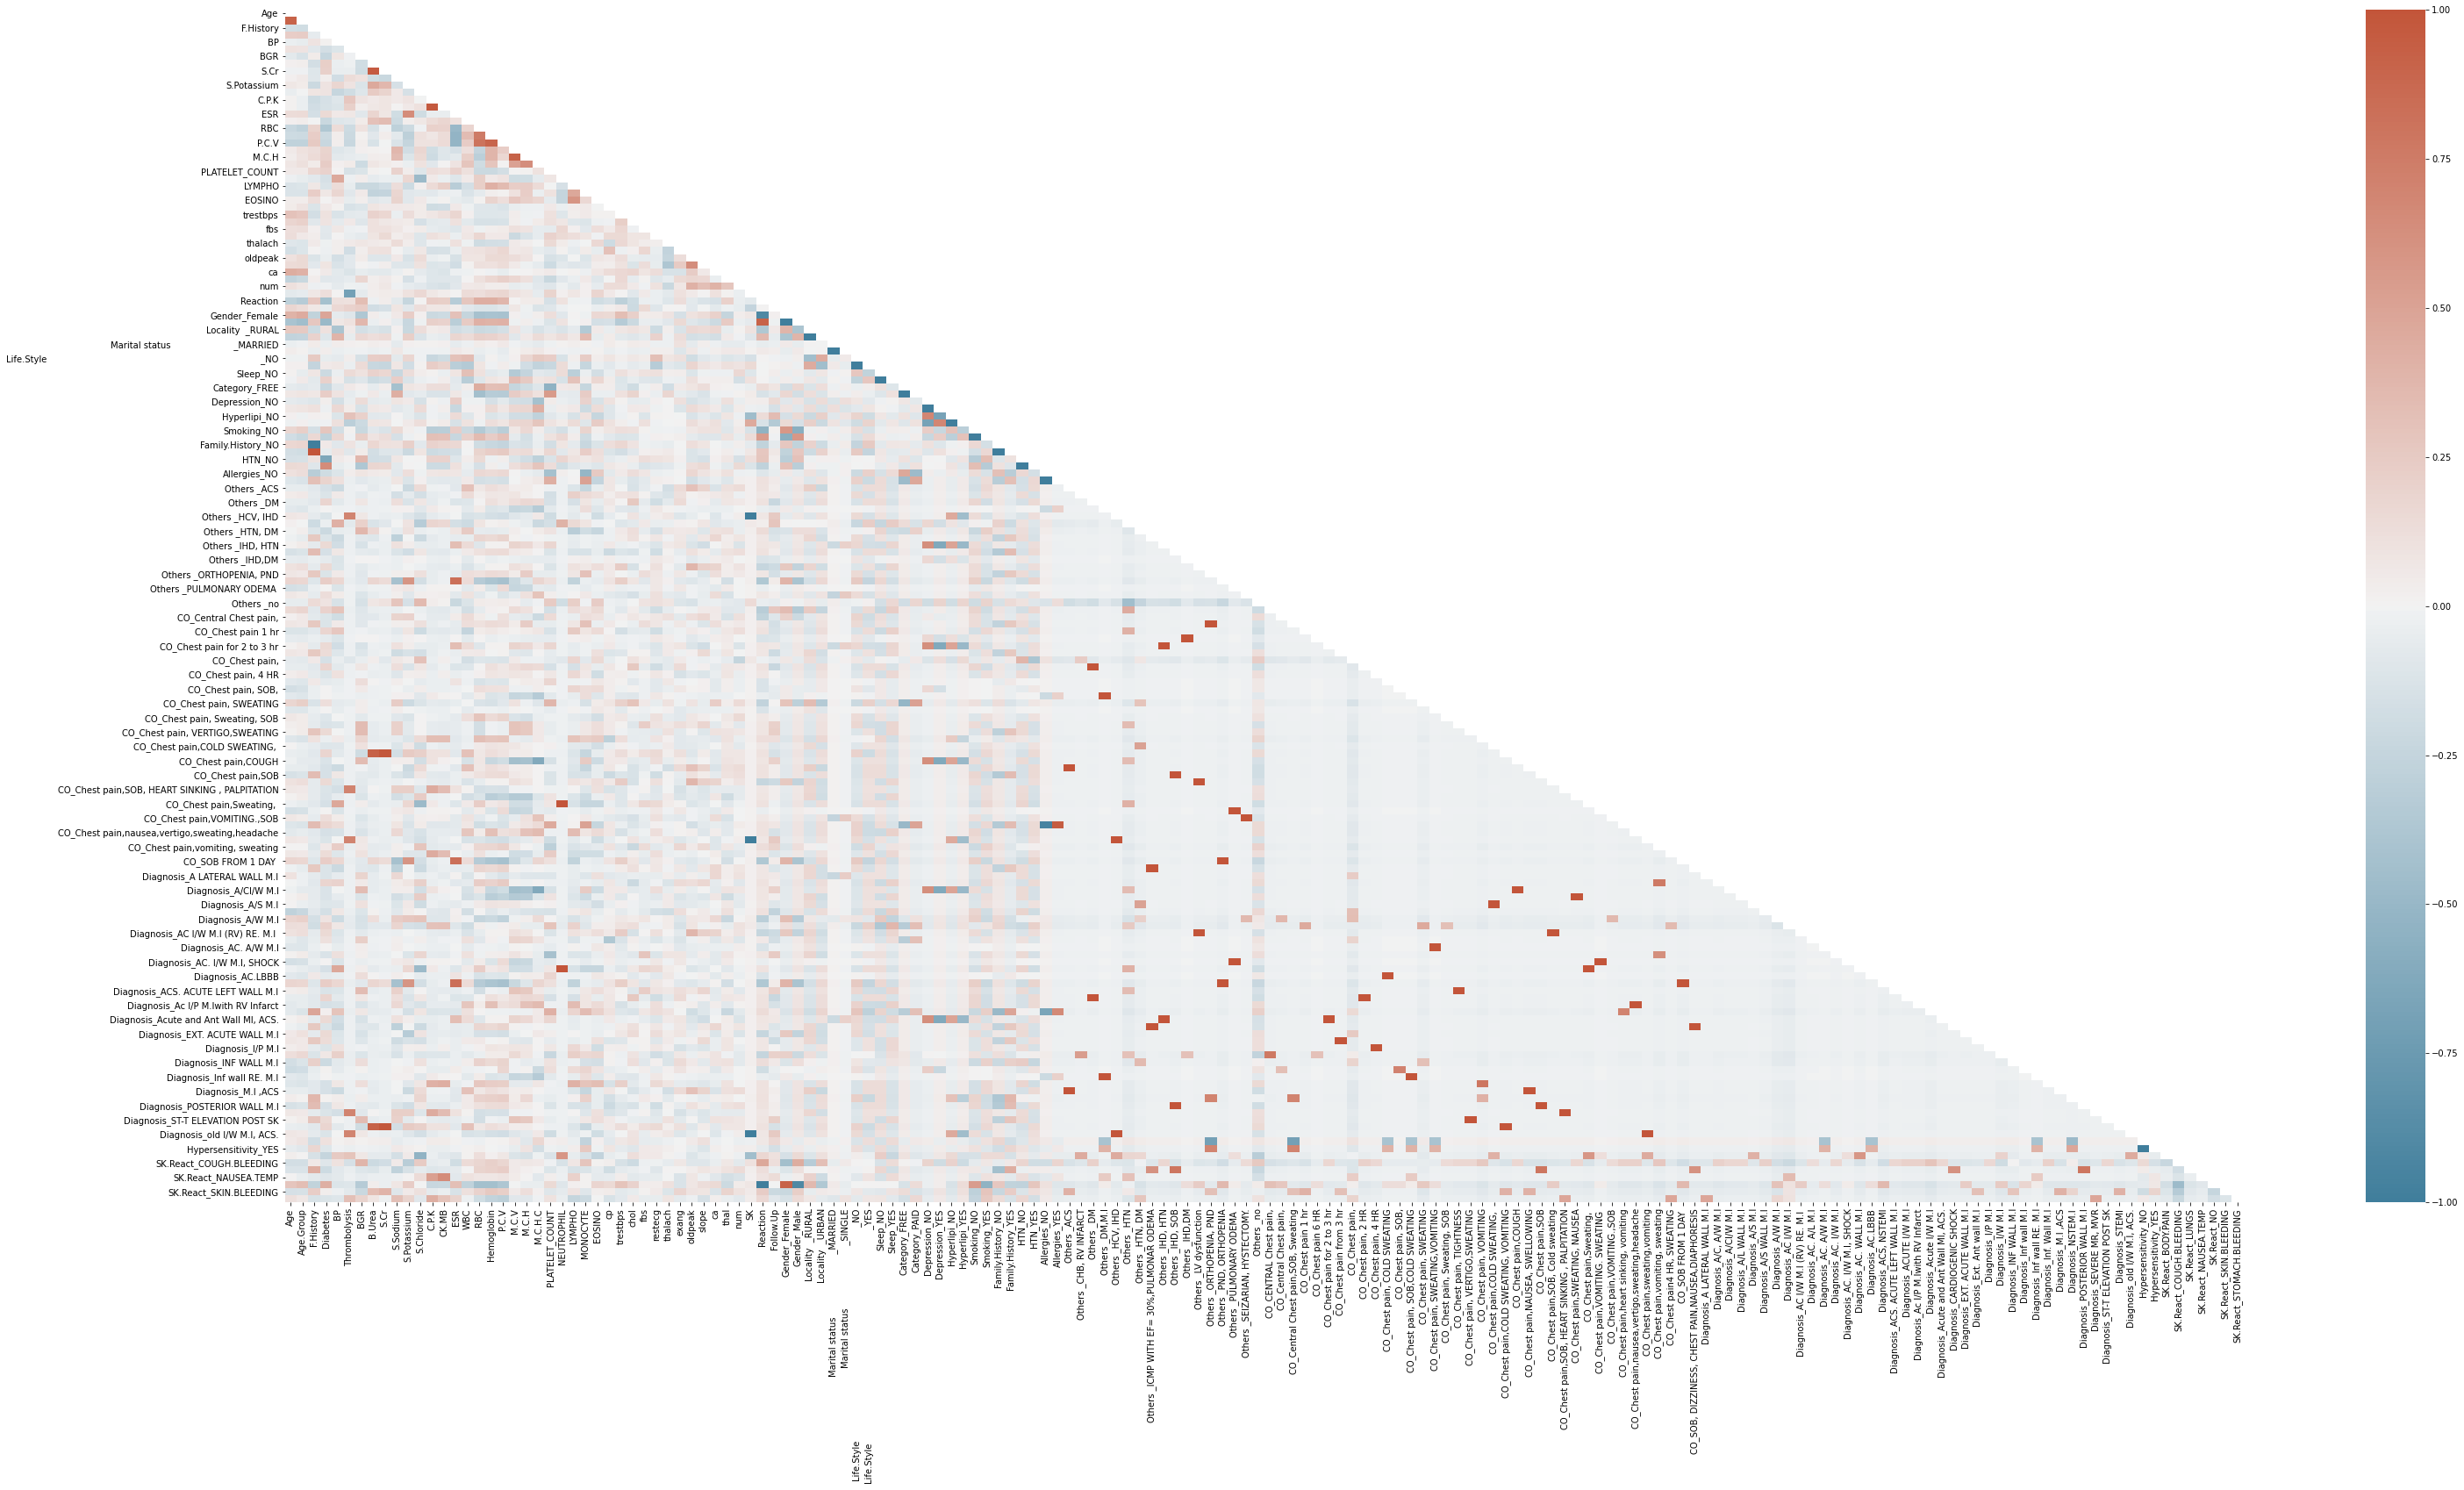

In [21]:
corr_matrix = X.corr()
f, ax = plt.subplots(figsize=(50, 25))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr_matrix, annot=False, mask = mask, cmap=cmap)

Agora preciso remover as variáveis muito correlacionadas.

In [22]:
correlated_features = set()
for i in range(len(corr_matrix .columns)):
    for j in range(i+1, len(corr_matrix .columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            print(corr_matrix.columns[i]+" - "+corr_matrix.columns[j])
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features)

#selecionei todas as correlações da minha matriz e peço para mostrar as correlações altas

Age - Age.Group
F.History - Family.History_NO
F.History - Family.History_YES
B.Urea - S.Cr
B.Urea - CO_Chest pain,COLD SWEATING, VOMITING
B.Urea - Diagnosis_STEMI
S.Cr - CO_Chest pain,COLD SWEATING, VOMITING
S.Cr - Diagnosis_STEMI
C.P.K - CK.MB
M.C.V - M.C.H
NEUTROPHIL - CO_Chest pain,Sweating, 
NEUTROPHIL - Diagnosis_AC. WALL M.I
SK - Others _HCV, IHD
SK - CO_Chest pain,sweating,vomiting
SK - Diagnosis_old I/W M.I, ACS.
Reaction - Gender_Female
Reaction - Gender_Male
Reaction - SK.React_NO
Gender_Female - Gender_Male
Gender_Female - SK.React_NO
Gender_Male - SK.React_NO
Locality  _RURAL - Locality  _URBAN
Marital status                       _MARRIED - Marital status                       _SINGLE
Life.Style                                                                              _NO - Life.Style                                                                              _YES
Sleep_NO - Sleep_YES
Category_FREE - Category_PAID
Depression_NO - Depression_YES
Hyperlipi_NO - Hyperlipi

In [23]:
len(correlated_features)

60

In [24]:
correlated_features

{'Age',
 'Allergies_NO',
 'Allergies_YES',
 'B.Urea',
 'C.P.K',
 'CO_Chest pain for 2 to 3 hr',
 'CO_Chest pain from 3 hr',
 'CO_Chest pain, 2 HR',
 'CO_Chest pain, 4 HR',
 'CO_Chest pain, COLD SWEATING',
 'CO_Chest pain, SOB,COLD SWEATING',
 'CO_Chest pain, SWEATING,VOMITING',
 'CO_Chest pain, TIGHTNESS',
 'CO_Chest pain, VERTIGO,SWEATING',
 'CO_Chest pain,COLD SWEATING, ',
 'CO_Chest pain,COLD SWEATING, VOMITING',
 'CO_Chest pain,COUGH',
 'CO_Chest pain,NAUSEA, SWELLOWING',
 'CO_Chest pain,SOB',
 'CO_Chest pain,SOB, Cold sweating',
 'CO_Chest pain,SOB, HEART SINKING , PALPITATION',
 'CO_Chest pain,SWEATING, NAUSEA',
 'CO_Chest pain,Sweating, ',
 'CO_Chest pain,VOMITING. SWEATING ',
 'CO_Chest pain,nausea,vertigo,sweating,headache',
 'CO_Chest pain,sweating,vomiting',
 'CO_SOB FROM 1 DAY ',
 'CO_SOB, DIZZINESS, CHEST PAIN,NAUSEA,DIAPHORESIS',
 'Category_FREE',
 'Depression_NO',
 'F.History',
 'Family.History_NO',
 'Gender_Female',
 'Gender_Male',
 'HTN_NO',
 'Hyperlipi_NO',
 'Hypersen

In [25]:
# para clareza na hora da analise, não vamos remover o genero e sim o reaction

correlated_features.remove('Gender_Female')
correlated_features.add('SK.React_NO')

In [26]:
X_novo = X.drop(labels=correlated_features, axis=1)

In [27]:
len(X_novo.columns)

106

Estimar informações mútuas para uma variável de destino discreta.

A informação mútua (MI) entre duas variáveis aleatórias é um valor não negativo, que mede a dependência entre as variáveis. É igual a zero se e somente se duas variáveis aleatórias são independentes, e valores mais altos significam maior dependência.

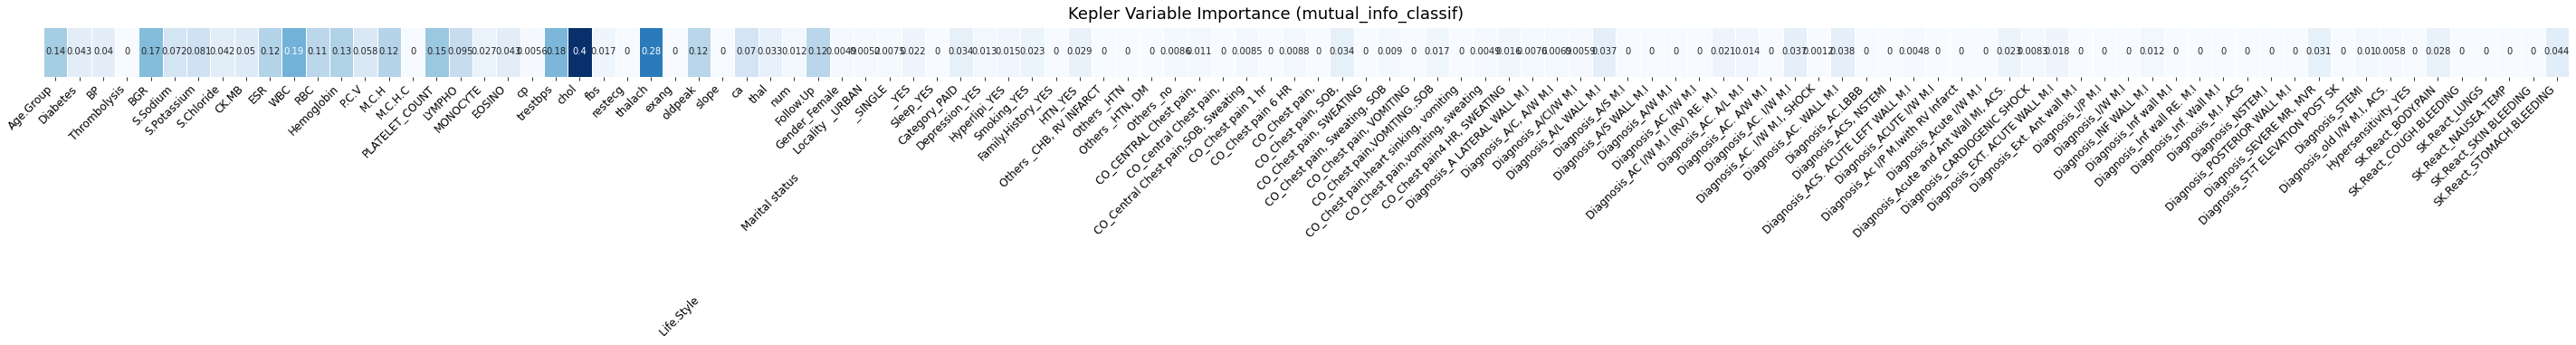

In [28]:
kepler_mutual_information = mutual_info_classif(X_novo, y)

plt.subplots(1, figsize=(50, 1))
sns.heatmap(kepler_mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(X_novo.columns, rotation=45, ha='right', fontsize=12)
plt.suptitle("Kepler Variable Importance (mutual_info_classif)", fontsize=18, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)

Variáveis como sono, alergias e hipersensibilidade não afetam na mortalidade, tendo valor de MI igual a 0, enquanto variáveis como chol, thalach e idade, afetam mais diretamente a Mortalidade 

Então vamos retirar as variáveis que são bastante idependentes 

In [29]:
from sklearn.feature_selection import GenericUnivariateSelect

# Vamos selecionar 30  variáveis para treino e ver como fica o nosso modelo
trans = GenericUnivariateSelect(score_func=mutual_info_classif, param=30)
X_novo2 = trans.fit_transform(X_novo, y)

In [30]:
trans.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False, False,  True,  True,  True, False,  True, False,
        True, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [31]:
X_novo.columns[trans.get_support()]

Index(['Age.Group', 'Diabetes', 'BP', 'BGR', 'S.Sodium', 'S.Potassium',
       'S.Chloride', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin', 'P.C.V',
       'M.C.H', 'PLATELET_COUNT', 'LYMPHO', 'MONOCYTE', 'trestbps', 'chol',
       'fbs', 'thalach', 'oldpeak', 'ca', 'Follow.Up', 'Gender_Female',
       'CO_Central Chest pain,', 'CO_Chest pain 6 HR',
       'Diagnosis_A LATERAL WALL M.I', 'Diagnosis_AC. WALL M.I',
       'Diagnosis_ACS. ACUTE LEFT WALL M.I',
       'Diagnosis_Ac I/P M.Iwith RV Infarct', 'Diagnosis_EXT. ACUTE WALL M.I'],
      dtype='object')

In [32]:
X_novo2 = pd.DataFrame(X_novo2, columns=X_novo.columns[trans.get_support()])

In [33]:
X_novo2.head()

,Age.Group,Diabetes,BP,BGR,S.Sodium,S.Potassium,S.Chloride,CK.MB,ESR,WBC,...,ca,Follow.Up,Gender_Female,"CO_Central Chest pain,",CO_Chest pain 6 HR,Diagnosis_A LATERAL WALL M.I,Diagnosis_AC. WALL M.I,Diagnosis_ACS. ACUTE LEFT WALL M.I,Diagnosis_Ac I/P M.Iwith RV Infarct,Diagnosis_EXT. ACUTE WALL M.I
0,2.0,1.0,100.6,84.0,138.0,3.3,107.0,30.0,11.0,9900.0,...,0.0,60.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3.0,0.0,90.6,135.0,144.0,4.7,104.0,30.0,27.0,15800.0,...,0.0,15.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,100.7,146.0,137.0,4.2,103.0,22.0,19.0,7900.0,...,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,1.0,160.1,146.0,137.0,4.2,103.0,22.0,19.0,7900.0,...,1.0,52.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,1.0,90.6,85.0,139.0,4.5,112.0,18.0,13.0,6900.0,...,2.0,34.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Features prontas! Vamos balancear as classes

In [34]:
y.value_counts()

0    288
1     80
Name: Mortality, dtype: int64

Temos 80 casos de mortalidade apenas. Qual estratégia de balanceamento vcs acham melhor?? Por quê?

- undersampling seria ruim porque os dados de não morte já são pequenos

- faço upsample

In [35]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split


In [36]:
# Primeiro vamos separar em treino e teste para conseguir avaliar melhor o nosso modelo

X_train,X_test,y_train,y_test=train_test_split(X_novo2,y,test_size=.2,random_state=1)

vou balancear só os dados de treino...

In [37]:
data=pd.concat([X_train,y_train],axis=1)


not_dead=data[data.Mortality==0]
dead=data[data.Mortality==1]

# upsample minority
dead_upsampled = resample(dead,
                          replace=True, # sample with replacement
                          n_samples=len(not_dead), # match number in majority class
                          random_state=13) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_dead, dead_upsampled])

# check new class counts
upsampled.Mortality.value_counts()

0    230
1    230
Name: Mortality, dtype: int64

In [38]:
# Antes de treinar o modelo, precisamos separar as features do nosso target (tomar muito cuidado para não treinar o modelo com ele!!!).
X_train = upsampled.drop('Mortality', axis=1)
y_train = upsampled['Mortality']

In [39]:
X_train.shape

(460, 32)

In [40]:
X_test.shape

(74, 32)

## **Treinamento**

Esse nosso primeiro modelo será uma K Nearest Neighbors (KNN). O scikit-learn já contém uma implementação do [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor).



O Scikit Learn tem a implementação de vários outros algoritmos: [aqui](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)!




In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciando o classificador
neigh = KNeighborsClassifier(n_neighbors=3)

# Treinamento do modelo
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**UHULLLLL! Temos nosso primeiro modelo de classificação \o/**


#### Tarefa de casa:
- Teste o KNN com diferentes valores de k! Qual K é o melhor para esse problema?

## Avaliando nosso modelo

Para isso, precisamos utilizá-lo para realizar as predições para nosso conjunto de teste:

In [42]:
preds = neigh.predict(X_test)

In [43]:
preds

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

A maioria dos modelos nos retorna uma uma probabilidade dos exemplos serem de cada uma das classes, ao invés da classe em si.

Usando **predict_proba** conseguimos extrair as probabilidades do KNN para o nosso conjunto de teste.


In [44]:
neigh.predict_proba(X_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.


Vamos começar avaliando a acurácia:


In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test, preds)

0.918918918918919

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [48]:
cm = confusion_matrix(y_test, preds)

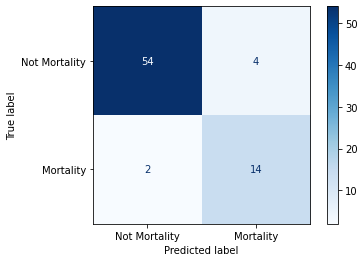

In [49]:
# plota a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Mortality', 'Mortality'])
disp.plot(cmap='Blues')

In [50]:
print(classification_report(y_test, preds, target_names=['not_Mortality', 'Mortality']))

               precision    recall  f1-score   support

not_Mortality       0.96      0.93      0.95        58
    Mortality       0.78      0.88      0.82        16

     accuracy                           0.92        74
    macro avg       0.87      0.90      0.89        74
 weighted avg       0.92      0.92      0.92        74



E como seria para calcular a AUC-ROC?

In [51]:
from sklearn.metrics import roc_curve, auc

# essa função calcula a curva roc e retorna a taxa de true positive, false positive e os thresholds
fpr, tpr, thresholds = roc_curve(y_test, preds)

auc(fpr, tpr)

0.9030172413793103

## Vamos ver como ficaria o modelo sem a seleção de features e sem balanceamento??

In [52]:
X.head()

,Age,Age.Group,F.History,Diabetes,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,...,"Diagnosis_old I/W M.I, ACS.",Hypersensitivity_NO,Hypersensitivity_YES,SK.React_BODY.PAIN,SK.React_COUGH.BLEEDING,SK.React_LUNGS,SK.React_NAUSEA.TEMP,SK.React_NO,SK.React_SKIN.BLEEDING,SK.React_STOMACH.BLEEDING
0,45,2,0,1,100.6,0,84,28.0,0.9,138,...,0,1,0,0,0,0,0,1,0,0
1,51,3,0,0,90.6,0,135,17.0,0.7,144,...,0,1,0,0,0,0,0,1,0,0
2,55,3,0,1,100.7,0,146,37.0,1.0,137,...,0,1,0,0,0,0,0,1,0,0
3,55,3,0,1,160.1,0,146,37.0,1.0,137,...,0,1,0,0,0,0,0,1,0,0
4,56,3,0,1,90.6,0,85,78.0,1.2,139,...,0,1,0,0,0,0,0,1,0,0


In [53]:
y.value_counts()

0    288
1     80
Name: Mortality, dtype: int64

In [54]:
X_train_semfe, X_test_semfe, y_train_semfe, y_test_semfe = train_test_split(X, y, test_size=.2, random_state=1)

# Instanciando o classificador
neigh_semfe = KNeighborsClassifier(n_neighbors=3)

# Treinamento do modelo
neigh_semfe.fit(X_train_semfe, y_train_semfe)

KNeighborsClassifier(n_neighbors=3)

               precision    recall  f1-score   support

not_Mortality       0.92      0.95      0.93        58
    Mortality       0.79      0.69      0.73        16

     accuracy                           0.89        74
    macro avg       0.85      0.82      0.83        74
 weighted avg       0.89      0.89      0.89        74

AUC: 0.8178879310344828


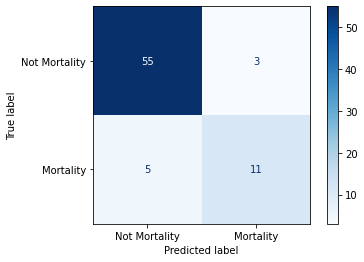

In [55]:
preds_semfe = neigh_semfe.predict(X_test_semfe)

cm_semfe = confusion_matrix(y_test_semfe, preds_semfe)

# plota a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm_semfe, display_labels=['Not Mortality', 'Mortality'])
disp.plot(cmap='Blues')

print(classification_report(y_test_semfe, preds_semfe, target_names=['not_Mortality', 'Mortality']))

# essa função calcula a curva roc e retorna a taxa de true positive, false positive e os thresholds
fpr_semfe, tpr_semfe, thresholds_semfe = roc_curve(y_test_semfe, preds_semfe)

print('AUC: ' + str(auc(fpr_semfe, tpr_semfe)))

## Que outras coisas poderiamos fazer com o dataset para melhorar nossos resultados? 

Tarefa de casa:
- mudar o threshold de correlação que está em 0.9 para outros valores
- aumentar ou diminuir a quantidade de features selecionadas pelo mutual information
- descobrir outras funções de distância

In [56]:
correlated_features = set()
for i in range(len(corr_matrix .columns)):
    for j in range(i+1, len(corr_matrix .columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            print(corr_matrix.columns[i]+" - "+corr_matrix.columns[j])
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features)

Age - Age.Group
F.History - Family.History_NO
F.History - Family.History_YES
B.Urea - S.Cr
B.Urea - CO_Chest pain,COLD SWEATING, VOMITING
B.Urea - Diagnosis_STEMI
S.Cr - CO_Chest pain,COLD SWEATING, VOMITING
S.Cr - Diagnosis_STEMI
C.P.K - CK.MB
ESR - Others _PND, ORTHOPENIA
ESR - CO_SOB FROM 1 DAY 
ESR - Diagnosis_ACS, NSTEMI
RBC - P.C.V
Hemoglobin - P.C.V
M.C.V - M.C.H
NEUTROPHIL - CO_Chest pain,Sweating, 
NEUTROPHIL - Diagnosis_AC. WALL M.I
SK - Others _HCV, IHD
SK - CO_Chest pain,sweating,vomiting
SK - Diagnosis_old I/W M.I, ACS.
Reaction - Gender_Female
Reaction - Gender_Male
Reaction - SK.React_NO
Gender_Female - Gender_Male
Gender_Female - SK.React_NO
Gender_Male - SK.React_NO
Locality  _RURAL - Locality  _URBAN
Marital status                       _MARRIED - Marital status                       _SINGLE
Life.Style                                                                              _NO - Life.Style                                                                           

In [57]:
len(correlated_features)

63

In [58]:
correlated_features

{'Age',
 'Allergies_NO',
 'Allergies_YES',
 'B.Urea',
 'C.P.K',
 'CO_Chest pain for 2 to 3 hr',
 'CO_Chest pain from 3 hr',
 'CO_Chest pain, 2 HR',
 'CO_Chest pain, 4 HR',
 'CO_Chest pain, COLD SWEATING',
 'CO_Chest pain, SOB,COLD SWEATING',
 'CO_Chest pain, SWEATING,VOMITING',
 'CO_Chest pain, TIGHTNESS',
 'CO_Chest pain, VERTIGO,SWEATING',
 'CO_Chest pain,COLD SWEATING, ',
 'CO_Chest pain,COLD SWEATING, VOMITING',
 'CO_Chest pain,COUGH',
 'CO_Chest pain,NAUSEA, SWELLOWING',
 'CO_Chest pain,SOB',
 'CO_Chest pain,SOB, Cold sweating',
 'CO_Chest pain,SOB, HEART SINKING , PALPITATION',
 'CO_Chest pain,SWEATING, NAUSEA',
 'CO_Chest pain,Sweating, ',
 'CO_Chest pain,VOMITING. SWEATING ',
 'CO_Chest pain,nausea,vertigo,sweating,headache',
 'CO_Chest pain,sweating,vomiting',
 'CO_SOB FROM 1 DAY ',
 'CO_SOB, DIZZINESS, CHEST PAIN,NAUSEA,DIAPHORESIS',
 'Category_FREE',
 'Depression_NO',
 'ESR',
 'F.History',
 'Family.History_NO',
 'Gender_Female',
 'Gender_Male',
 'HTN_NO',
 'Hemoglobin',
 'Hy

In [59]:
correlated_features.remove('Gender_Female')
correlated_features.add('SK.React_NO')

In [60]:
X_novo = X.drop(labels=correlated_features, axis=1)

In [61]:
len(X_novo.columns)

103

In [62]:
# Mudando para 20 variáveis
trans = GenericUnivariateSelect(score_func=mutual_info_classif, param=20)
X_novo2 = trans.fit_transform(X_novo, y)

In [63]:
trans.get_support()

array([ True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True, False,
        True,  True, False, False,  True, False,  True, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [64]:
X_novo.columns[trans.get_support()]

Index(['Age.Group', 'Diabetes', 'BGR', 'S.Sodium', 'S.Potassium', 'S.Chloride',
       'CK.MB', 'WBC', 'P.C.V', 'M.C.H', 'PLATELET_COUNT', 'LYMPHO', 'EOSINO',
       'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'Follow.Up',
       'Diagnosis_AC. A/W M.I', 'Diagnosis_CARDIOGENIC SHOCK'],
      dtype='object')

In [65]:
X_novo2 = pd.DataFrame(X_novo2, columns=X_novo.columns[trans.get_support()])

In [66]:
y.value_counts()

0    288
1     80
Name: Mortality, dtype: int64

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X_novo2,y,test_size=.2,random_state=1)

In [68]:
data=pd.concat([X_train,y_train],axis=1)


not_dead=data[data.Mortality==0]
dead=data[data.Mortality==1]


dead_upsampled = resample(dead,
                          replace=True, 
                          n_samples=len(not_dead), 
                          random_state=13) 


upsampled = pd.concat([not_dead, dead_upsampled])


upsampled.Mortality.value_counts()

0    230
1    230
Name: Mortality, dtype: int64

In [69]:
X_train = upsampled.drop('Mortality', axis=1)
y_train = upsampled['Mortality']

In [70]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [71]:
preds = neigh.predict(X_test)

In [72]:
preds

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [73]:
neigh.predict_proba(X_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.

In [74]:
cm = confusion_matrix(y_test, preds)

               precision    recall  f1-score   support

not_Mortality       0.96      0.93      0.95        58
    Mortality       0.78      0.88      0.82        16

     accuracy                           0.92        74
    macro avg       0.87      0.90      0.89        74
 weighted avg       0.92      0.92      0.92        74



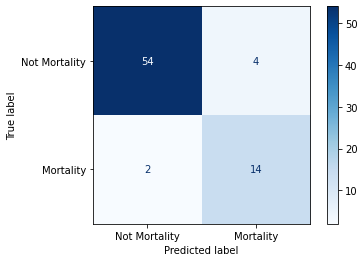

In [75]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Mortality', 'Mortality'])
disp.plot(cmap='Blues')

print(classification_report(y_test, preds, target_names=['not_Mortality', 'Mortality']))